<a href="https://colab.research.google.com/github/Aashrut/Machine-Learning/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [11]:
# Imports Required Libraries
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score,roc_auc_score,classification_report,auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline


# load Iris dataset
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0.5, 1.0, 'Correlation')

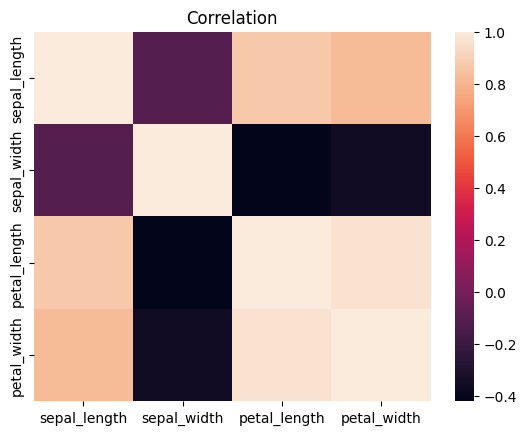

In [13]:
#Data Visualisation
plt.figure(1)
sns.heatmap(df.corr(numeric_only=True))
plt.title('Correlation')


In [14]:
df['species'] = df['species'].replace('Iris-setosa',1)
df['species'] = df['species'].replace('Iris-versicolor',2)
df['species'] = df['species'].replace('Iris-virginica',3)

#choosing the features and target columns
X = df.drop(['species'], axis=1)
y = df['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


#Scaling Data
scaler = StandardScaler()

#Note that we always model/fit the scaling on the training dataset 
# then apply the fitted model on both training and testing datasets
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 


In [15]:
# Reduce the features' dimensions : for illustration purposes only, the dimenions are already small : 4
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.fit_transform(X_test)

In [16]:
# Model optimization
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#Prepare the SVC algorithm
svclass = SVC(kernel='rbf', C= 100.0)

# declare parameters for hyperparameter tuning
parameters = [{'C':[1, 10, 100, 1000], 
               'kernel':['linear','rbf','poly'], 
               'degree': [2,3,4], 
               'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
              }
             ]

optimalmodel = GridSearchCV(estimator = svclass,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

optimalmodel.fit(X_train2, y_train)



GridSearchCV(cv=5, estimator=SVC(C=100.0),
             param_grid=[{'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['linear', 'rbf', 'poly']}],
             scoring='accuracy')

In [17]:
y_pred=optimalmodel.predict (X_test2)

from sklearn.metrics import accuracy_score
# Assess model accuracy
result = accuracy_score(y_test, y_pred, normalize=True)
print ('AUC=', result)

print(classification_report(y_test, y_pred))

AUC= 0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.77      0.87        13
           3       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45



Confusion Matrix For the Optimal Support Vector Model Using the testing Dataset:
 [[19  0  0]
 [ 0 10  3]
 [ 0  0 13]]

True Positives(TP) =  19

True Negatives(TN) =  23

Misclassified cases=  3


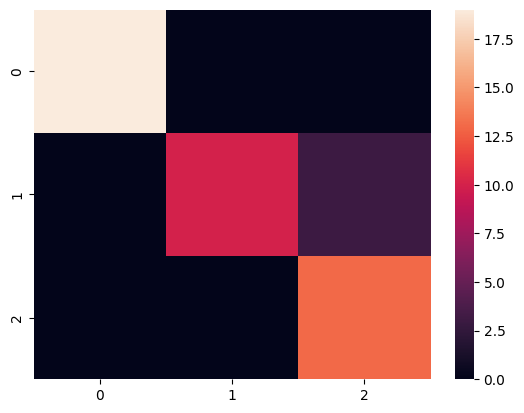

In [18]:
cm = confusion_matrix(y_test, y_pred)

misc= cm[0,1]+ cm[0,2] + cm[1,0]+ cm[1,2]+cm[2,0]+ cm[2,1]
print('Confusion Matrix For the Optimal Support Vector Model Using the testing Dataset:\n',cm )
print('\nTrue Positives(TP) = ', cm[0,0] )
print('\nTrue Negatives(TN) = ', cm[1,1] +cm[2,2])
print('\nMisclassified cases= ', misc)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)))
plt.show()


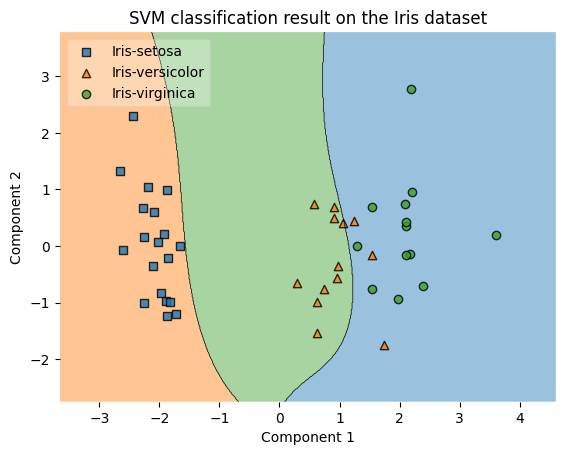

In [19]:
from mlxtend.plotting import plot_decision_regions # you need to: pip install mlxtend
#plot the classification
pldec = plot_decision_regions(X_test2, y_test, clf=optimalmodel, legend=0)

# Plot decision regions
# Adding axes annotations
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVM classification result on the Iris dataset')
handles, labels = pldec.get_legend_handles_labels()
pldec.legend(handles, 
          ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
           framealpha=0.3, scatterpoints=1)

plt.show()